dc
study area tracts 272 dc 2010
number of bike stations 99 2010
income 75418.23161764706 2010 dc
Service area Tracts 61 dc 2010
study area tracts 271 dc 2011
number of bike stations 135 2011
income 79287.52398523985 2011 dc
Service area Tracts 78 dc 2011
study area tracts 271 dc 2012
number of bike stations 180 2012
income 81816.30258302583 2012 dc
Service area Tracts 95 dc 2012
study area tracts 271 dc 2013
number of bike stations 246 2013
income 83828.16974169742 2013 dc
Service area Tracts 119 dc 2013
study area tracts 271 dc 2014
number of bike stations 276 2014
income 86354.53505535056 2014 dc
Service area Tracts 134 dc 2014
study area tracts 271 dc 2015
number of bike stations 287 2015
income 87998.80073800738 2015 dc
Service area Tracts 138 dc 2015
study area tracts 271 dc 2016
number of bike stations 335 2016
income 90404.12915129152 2016 dc
Service area Tracts 155 dc 2016
study area tracts 271 dc 2017
number of bike stations 367 2017
income 94809.35793357933 2017 dc
Service a

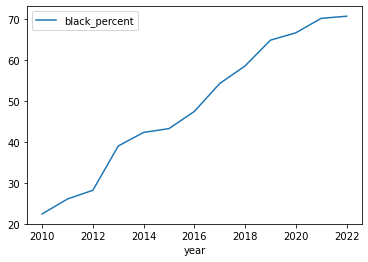

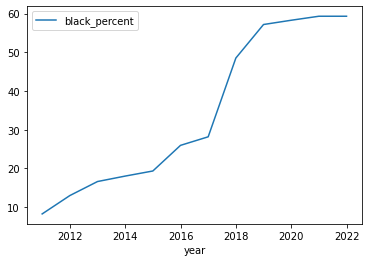

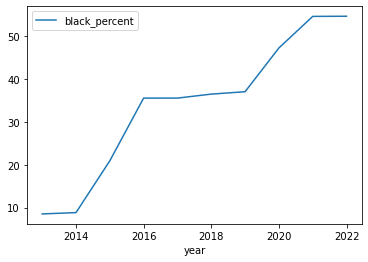

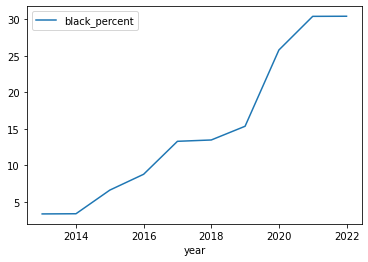

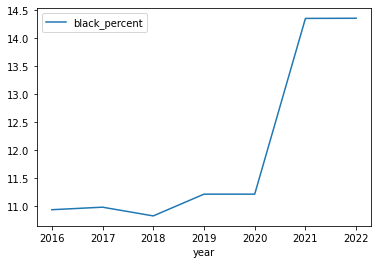

In [64]:
from turfpy.measurement import boolean_point_in_polygon
from geojson import Point, Polygon, Feature
import pandas as pd
from shapely.geometry import shape
import json
import geojson
def get_filepath(state):
    return '../data/{state}/'.format(state=state)
def get_filepath_city(city):
    return '../data/' + city + '-bike/'

STATES = ['dc', 'ma', 'il', 'ny', 'pa']
CITIES = ['dc', 'boston', 'chicago', 'nyc', 'philly']
START_YEARS = [2010, 2011, 2013, 2013, 2016]
df_storage = {}
c = 0
for STATE, CITY in zip(STATES, CITIES):
    print(STATE)
    data = pd.read_csv(get_filepath(STATE) + f'{STATE}_preprocessed_data.csv')
    
    output_df = pd.DataFrame()

    white = []
    black = []
    asian = []
    other = []
    high_income = []
    low_income = []
    population = []
    years = range(START_YEARS[c], 2023)
    for year in years:
        temp_data = data.loc[data['year'] == year]
        print('study area tracts', len(temp_data), CITY, year)
        bikes = temp_data['num_bikes'].to_list()
        print('number of bike stations', sum(bikes), year)
        white_pop = temp_data['num_white'].tolist()
        black_pop = temp_data['num_black'].tolist()
        asian_pop = temp_data['num_asian'].to_list()
        other_pop = [i+j for (i, j) in zip(temp_data['num_other'].to_list(), temp_data['num_2om'].to_list())]
        pop = temp_data['households'].tolist()
        total_pop = sum(pop)
        income = temp_data['median_income'].tolist()
        avg_income = sum(income)/len(income)
        print('income',avg_income, year, CITY)
        
        total_high = 0
        total_low = 0
        for idx, val in enumerate(income):
            if val > avg_income:
                total_high += pop[idx]
            if val < avg_income:
                total_low += pop[idx]
            
        inArea = temp_data['inServiceArea']
        total_white = sum(white_pop)
        total_black = sum(black_pop)
        total_asian = sum(asian_pop)
        total_other = sum(other_pop)
        in_white, in_black, in_asian, in_other, in_high, in_low, in_total = 0,0,0,0,0, 0, 0
        in_serv_count = 0
        for idx, val in enumerate(inArea):
            if val:
                in_serv_count+=1
                in_white += white_pop[idx]
                in_black += black_pop[idx]
                in_asian += asian_pop[idx]
                in_other += other_pop[idx]
                in_total += pop[idx]

                inc = income[idx]
                if inc > avg_income:
                    in_high += pop[idx]
                elif inc < avg_income:
                    in_low += pop[idx]
        print('Service area Tracts', in_serv_count, CITY, year)

        white.append((in_white/total_white)*100)
        black.append((in_black/total_black)*100)
        asian.append((in_asian/total_asian)*100)
        other.append((in_other/total_other)*100)
        high_income.append((in_high/total_high)*100)
        low_income.append((in_low/total_low)*100)
        population.append((in_total/total_pop)*100)

    output_df['year'] = years
    output_df['total_percent'] = population
    output_df['white_percent'] = white
    output_df['black_percent'] = black
    output_df['asian_percent'] = asian
    output_df['other_percent'] = other
    output_df['high_income_percent'] = high_income
    output_df['low_income_percent'] = low_income


    output_df
    df_storage[CITY] = output_df
    output_df.plot(x = 'year', y = 'black_percent')
    c+=1


print(df_storage)

In [68]:
df_storage['philly'].to_clipboard()

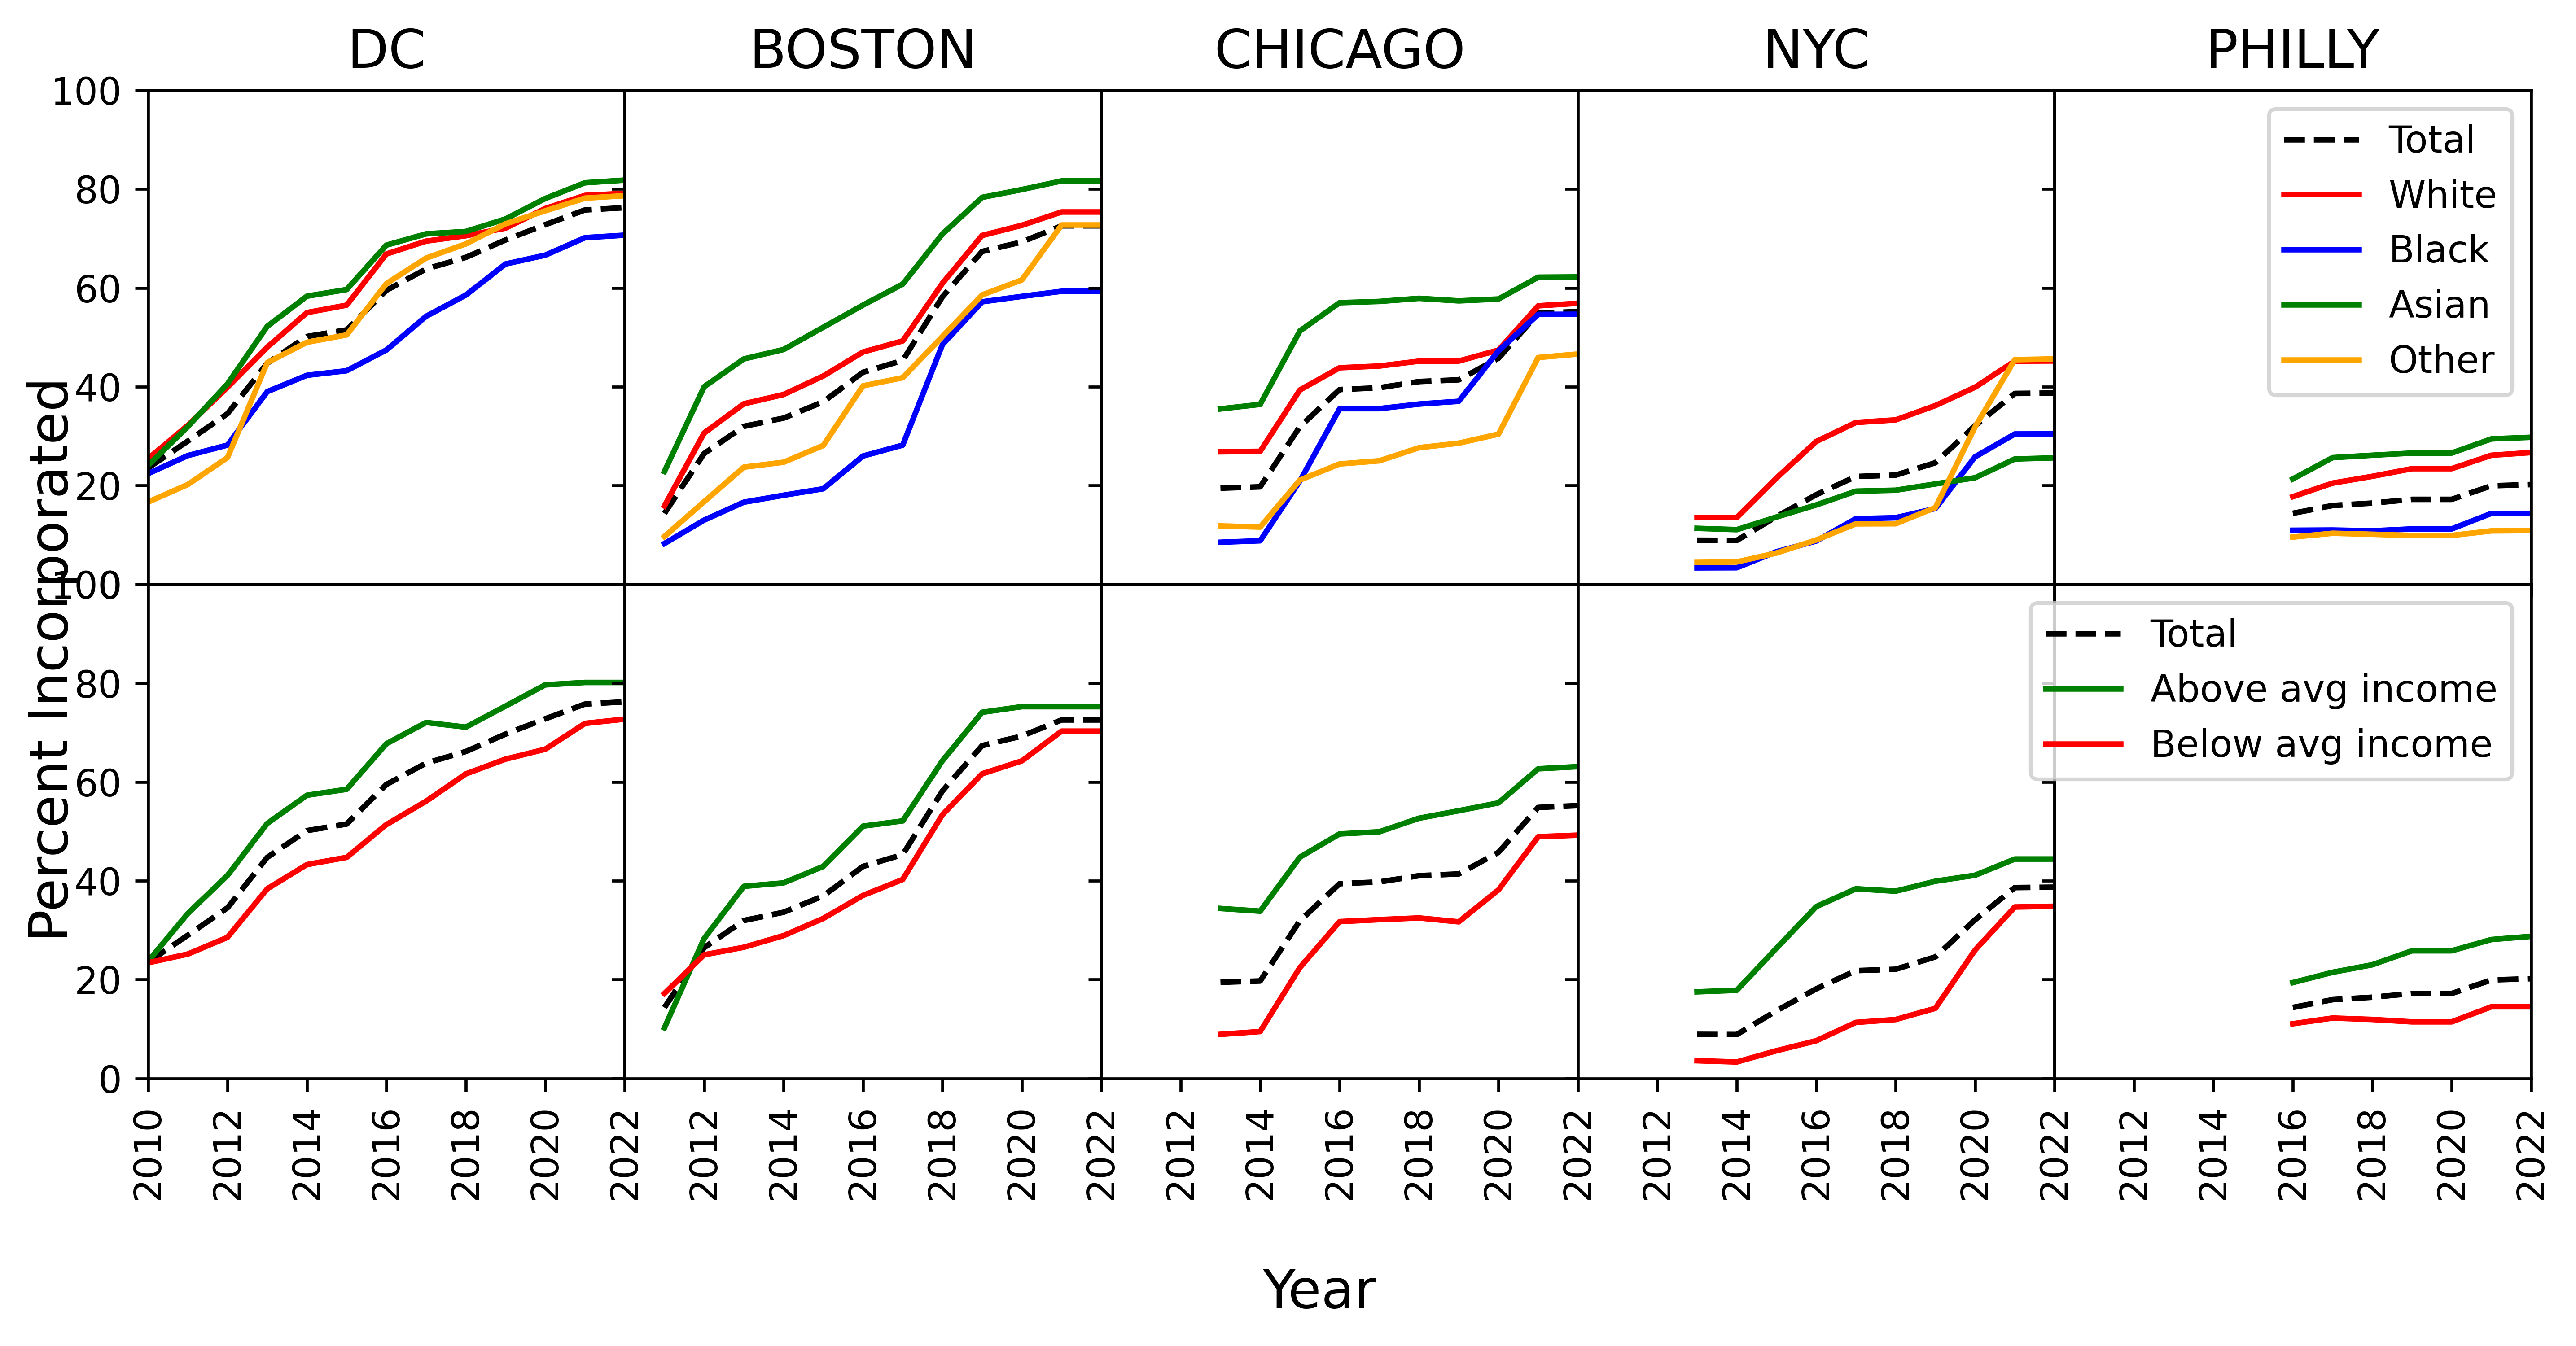

In [44]:
import matplotlib.pyplot as plt


issues_1 = ['total_percent', 'white_percent', 'black_percent', 'asian_percent', 'other_percent']
colors_1 = ['black', 'red', 'blue', 'green', 'orange']
issues_2 = ['total_percent', 'high_income_percent', 'low_income_percent']
colors_2 = ['black', 'green', 'red']
labels_1 = ['Total', 'White', 'Black', 'Asian', 'Other']
labels_2 = ['Total','Above avg income', 'Below avg income']
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (10, 5),sharey = 'row',sharex = 'col',  dpi = 600)
yabs_max = 0
yabs_min = 100

for i, city in enumerate(CITIES):
    for j, issue in enumerate(issues_1):
        df = df_storage[city]
        x = df['year'].tolist()
        y = df[issue].tolist()
        c = colors_1[j]
        if c == 'black': style = 'dashed' 
        else: style = 'solid'
        axs[0, i].plot(x, y, color = c, label = labels_1[j], linestyle = style)
    for j, issue in enumerate(issues_2):
        df = df_storage[city]
        x = df['year'].tolist()
        y = df[issue].tolist()
        c = colors_2[j]
        if c == 'black': style = 'dashed' 
        else: style = 'solid'
        axs[1, i].plot(x, y, color = c, label = labels_2[j], linestyle = style)
    axs[0, i].set_title(city.upper(), fontsize = 'x-large')
    axs[0, i].set_ylim(ymin=0, ymax=100) 
    axs[0, i].set_xlim(2010, 2022)
    axs[1, i].set_ylim(ymin=0, ymax=100) 
    axs[1, i].set_xlim(2010, 2022)
    axs[1, i].set_xticks([2012, 2014, 2016, 2018, 2020, 2022])
    axs[1, i].set_xticklabels([2012, 2014, 2016, 2018, 2020, 2022], rotation=90)

axs[0, i].legend()
axs[1, i].legend()
axs[1, 0].set_xticks([2010, 2012, 2014, 2016, 2018, 2020, 2022])
axs[1, 0].set_xticklabels([2010, 2012, 2014, 2016, 2018, 2020, 2022], rotation=90)
# handles, labels = axs[1, i].get_legend_handles_labels()
# fig.legend(handles, labels)  
fig.supylabel('Percent Incorporated', fontsize = 'x-large')
fig.supxlabel("Year", fontsize = 'x-large')
# fig.suptitle("Percents of Demographics Included in Service Area by Year", fontsize = 'xx-large')
fig.tight_layout()
fig.subplots_adjust(right=.95)
fig.subplots_adjust(left = .065)
fig.subplots_adjust(wspace=0, hspace=0)
